In [2]:
import numpy as np
import matplotlib.pyplot as plt
#import Transit_HST_Funcs as hst

In [2]:
# load in thomas' spectral light curves
datadict = np.load('./Transit_Spectra_NoFirst_Visit3.npz')
timesT = datadict['time']
oneDspecT = datadict['flux']
oneDerrT = datadict['error']
scandirT = datadict['scandir']

# load in my spectral light curves
mydata = np.load('/home/mmmurphy/data/hd219666b/reduced_data/allorbits_rawSpectralLightcurves.npz')
timesM = np.concatenate((mydata['orbit2_times'], mydata['orbit3_times'], mydata['orbit4_times']))
oneDspecM = np.concatenate((mydata['orbit2_flux'], mydata['orbit3_flux'], mydata['orbit4_flux']))
oneDerrM = np.concatenate((mydata['orbit2_error'], mydata['orbit3_error'], mydata['orbit4_error']))
scandirM = np.concatenate((mydata['orbit2_scandirs'], mydata['orbit3_scandirs'], mydata['orbit4_scandirs']))


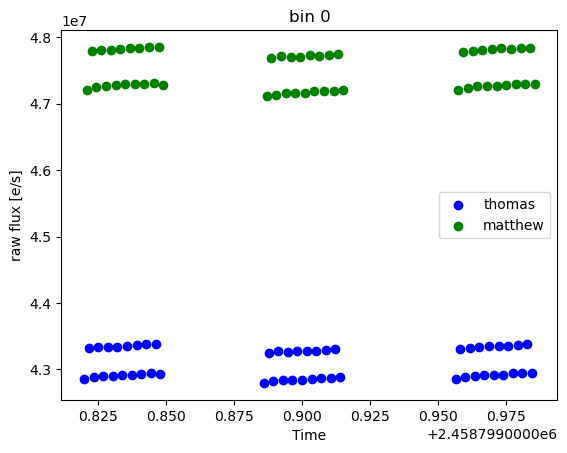

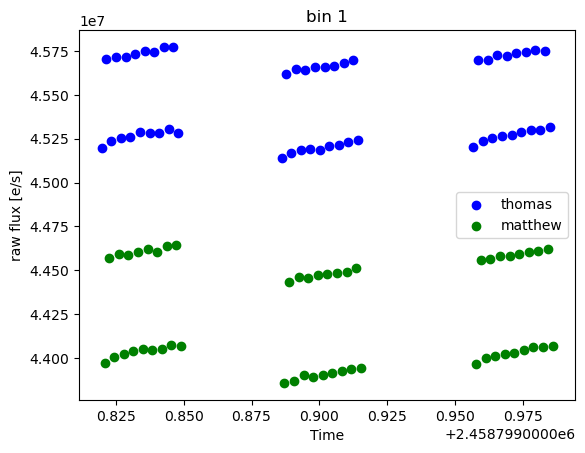

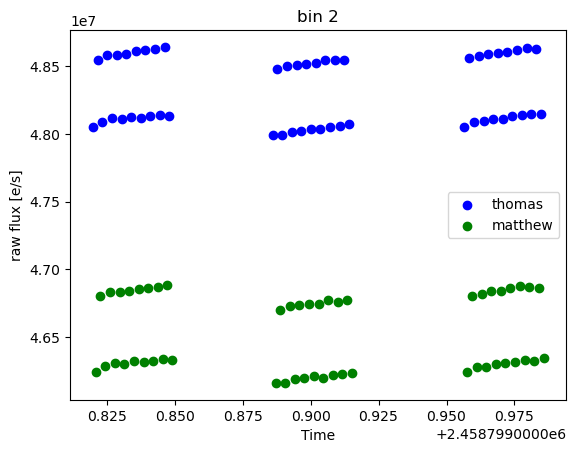

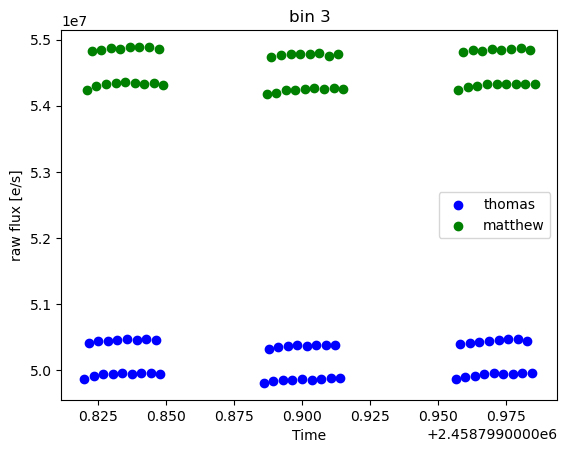

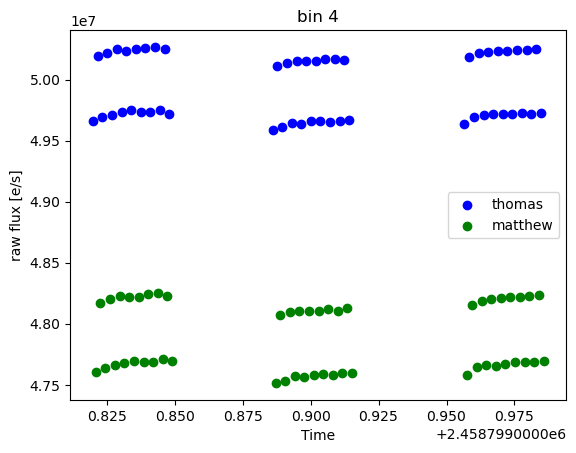

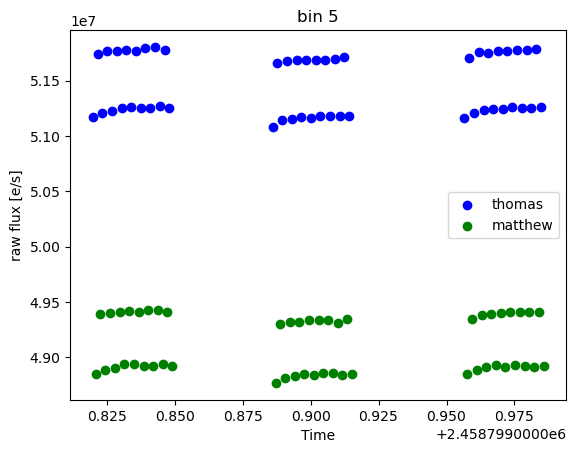

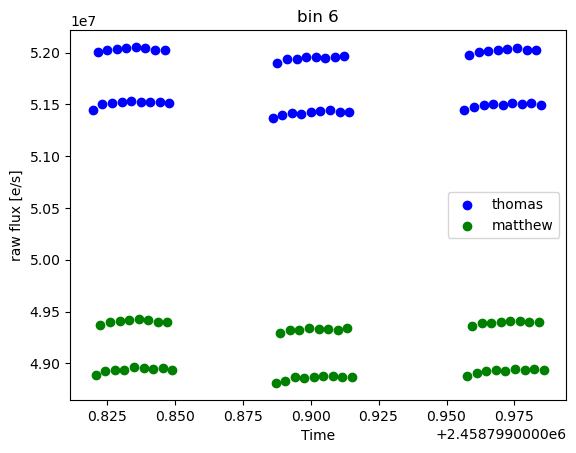

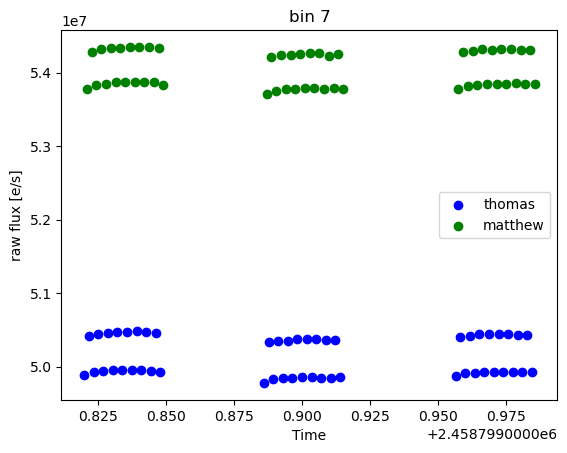

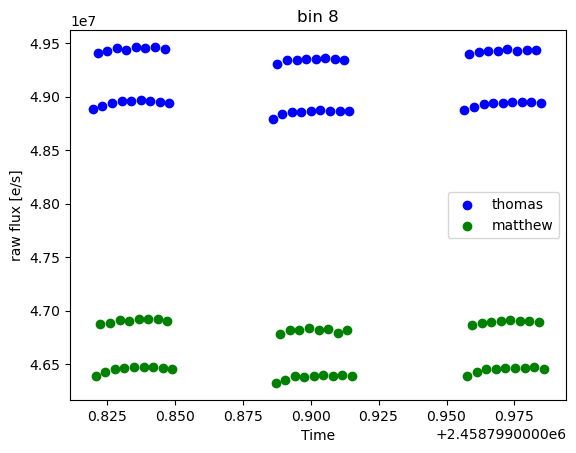

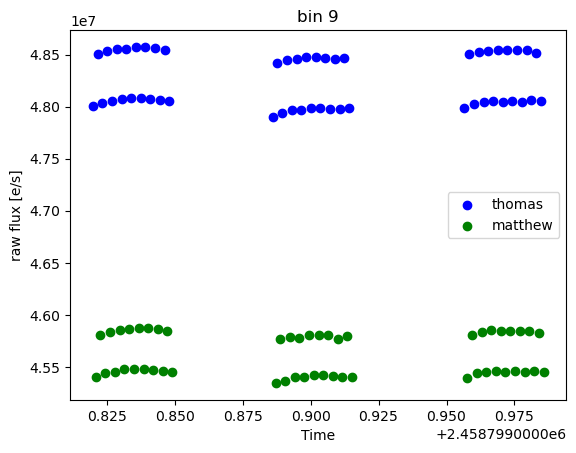

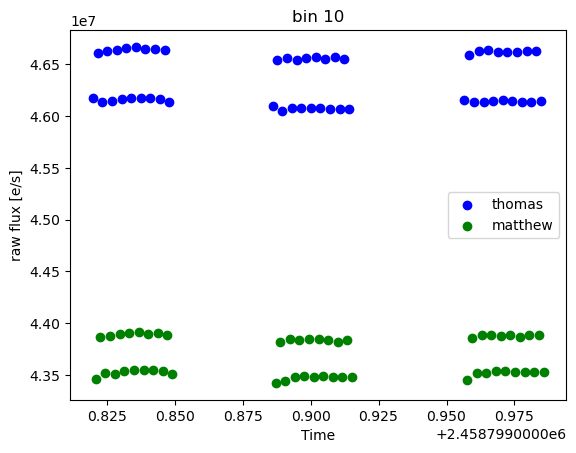

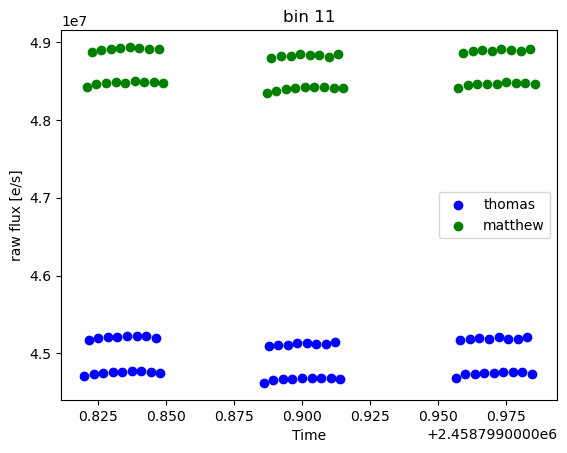

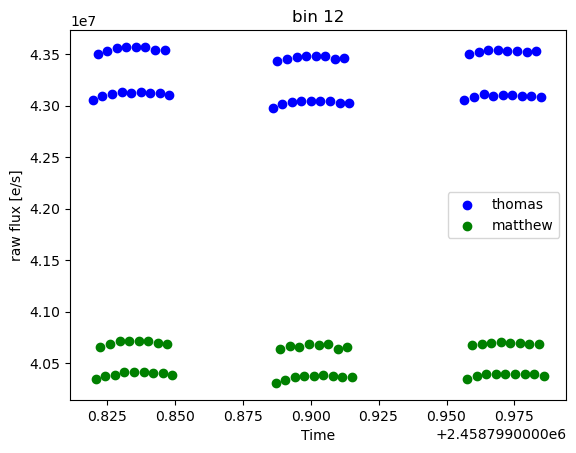

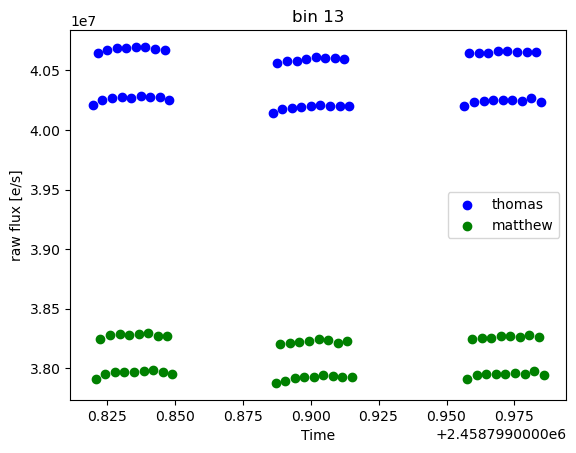

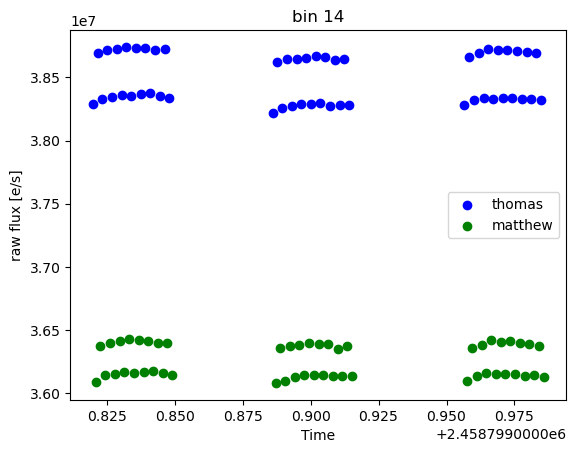

In [3]:
for i in range(oneDspecT.shape[0]):
    plt.scatter(timesT, oneDspecT[i,:], c='blue', label='thomas')
    plt.scatter(timesM, oneDspecM[:,i], c='green', label='matthew')
    plt.xlabel('Time')
    plt.ylabel('raw flux [e/s]')
    plt.legend(loc='best')
    plt.title('bin %d'%(i))
    plt.show()

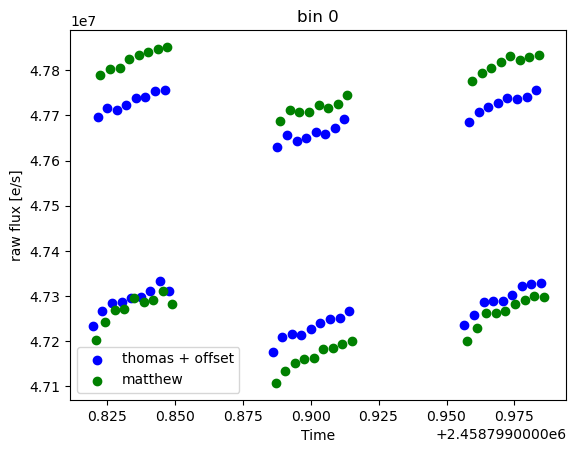

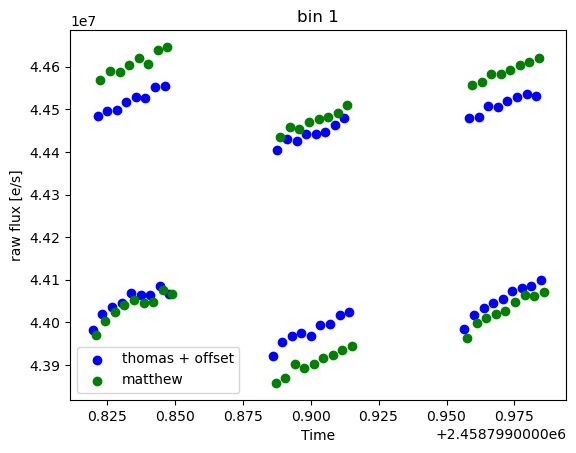

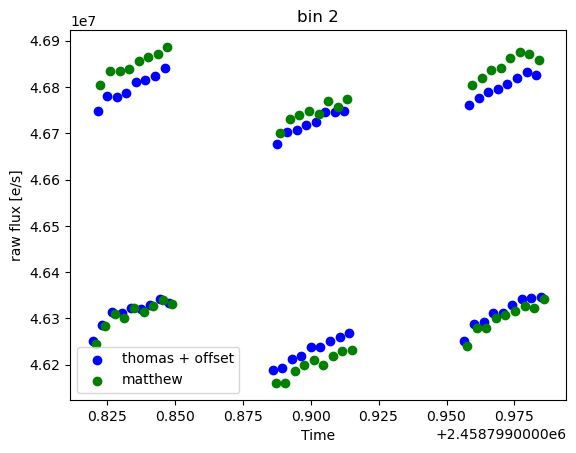

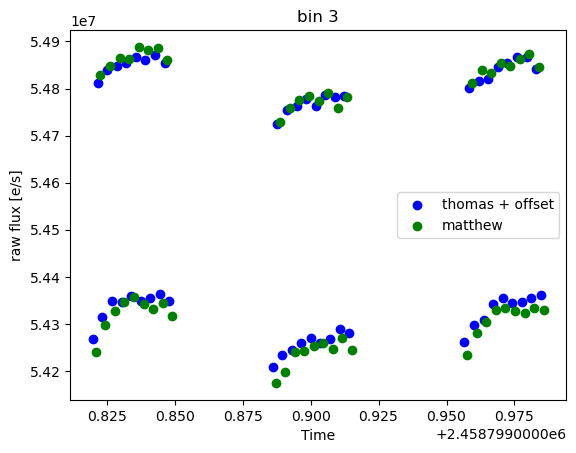

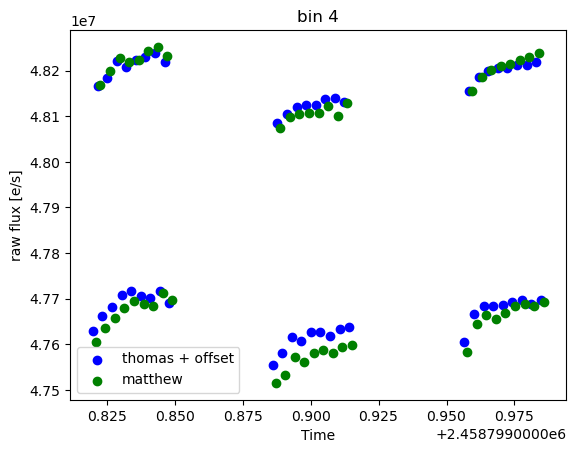

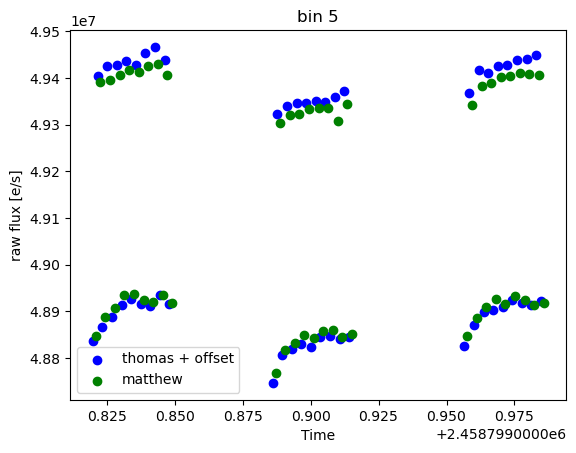

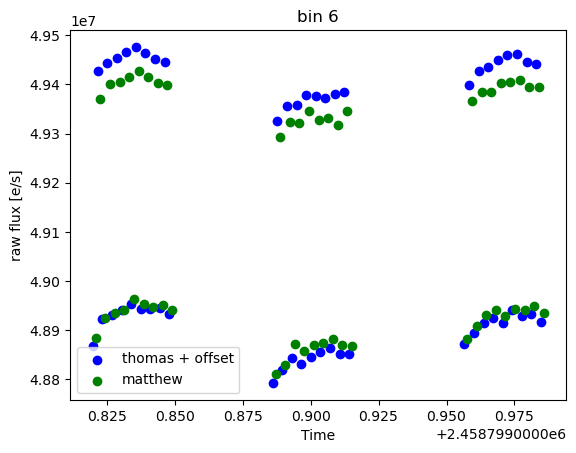

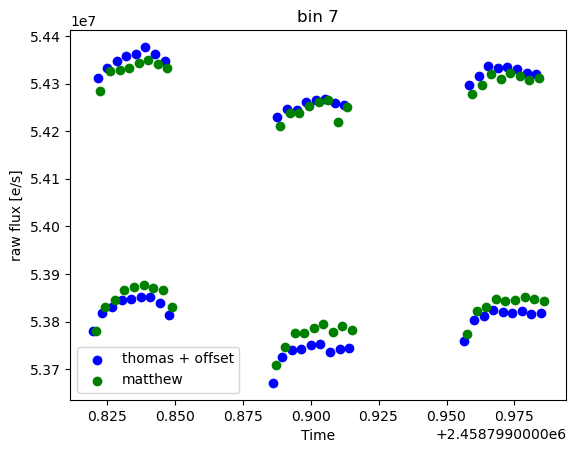

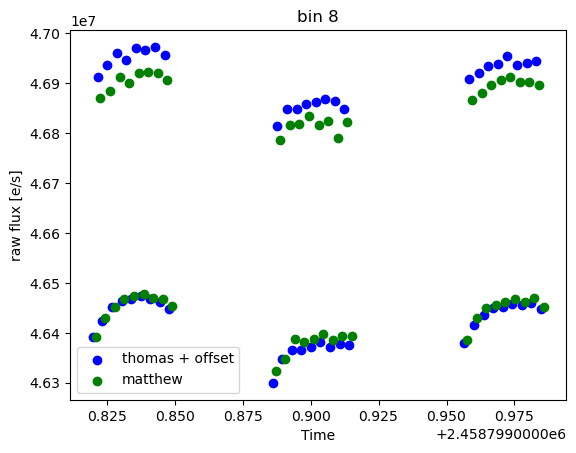

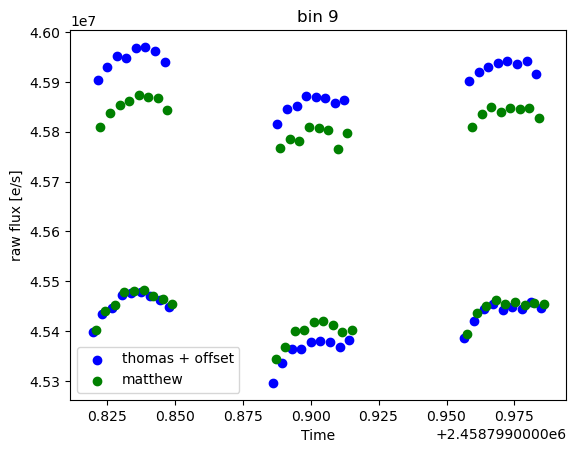

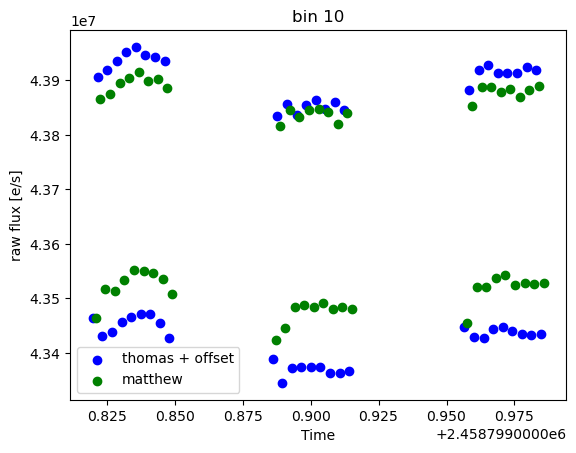

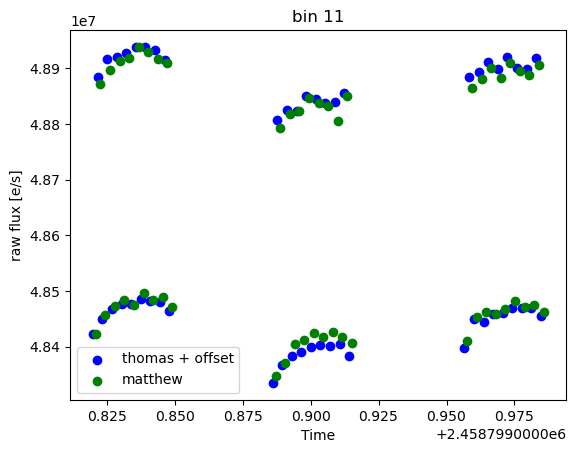

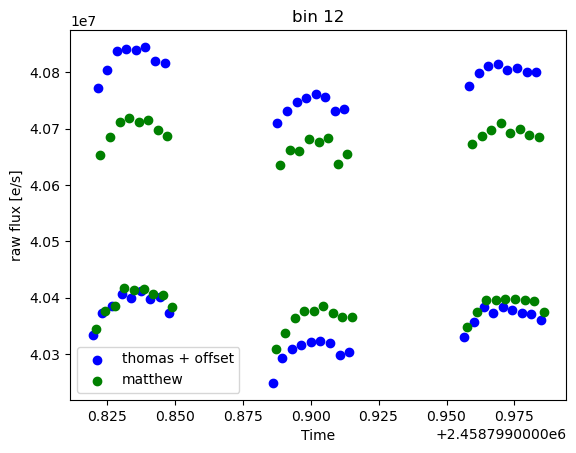

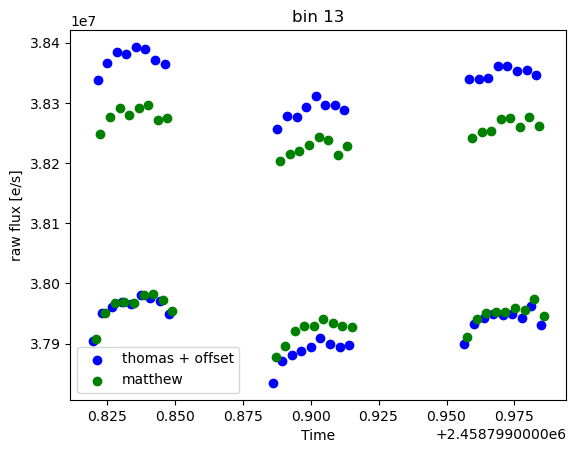

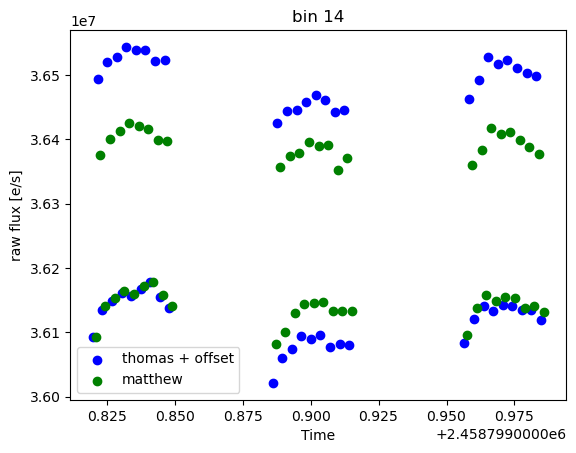

In [4]:
for i in range(oneDspecT.shape[0]):
    diffs = oneDspecM[:17,i] - oneDspecT[i,:17]
    offset = np.median(diffs)
    plt.scatter(timesT, oneDspecT[i,:]+offset, c='blue', label='thomas + offset')
    plt.scatter(timesM, oneDspecM[:,i], c='green', label='matthew')
    plt.xlabel('Time')
    plt.ylabel('raw flux [e/s]')
    plt.legend(loc='best')
    plt.title('bin %d'%(i))
    plt.show()

In [5]:
normspecT = np.copy(oneDspecT)
normspecM = np.copy(oneDspecM)
Nbins = oneDspecT.shape[0]
for wav in range(Nbins):
    # normalizing thomas'
    sd1_idxsT = np.where(scandirT == 1.)[0]
    sd0_idxsT = np.where(scandirT == 0.)[0]
    
    orbit2_sd1T = oneDspecT[wav,:][sd1_idxsT][:8]
    orbit2_sd0T = oneDspecT[wav,:][sd0_idxsT][:8]
    
    normval1T, normval0T = np.max(orbit2_sd1T), np.max(orbit2_sd0T)
    normspecT[wav, sd1_idxsT] /= normval1T
    normspecT[wav, sd0_idxsT] /= normval0T
    
    # normalizing mine
    sd1_idxsM = np.where(scandirT == 1.)[0]
    sd0_idxsM = np.where(scandirT == 0.)[0]
    
    orbit2_sd1M = oneDspecM[:,wav][sd1_idxsM][:8]
    orbit2_sd0M = oneDspecM[:,wav][sd0_idxsM][:8]
    
    normval1M, normval0M = np.max(orbit2_sd1M), np.max(orbit2_sd0M)
    normspecM[sd1_idxsM, wav] /= normval1M
    normspecM[sd0_idxsM, wav] /= normval0M


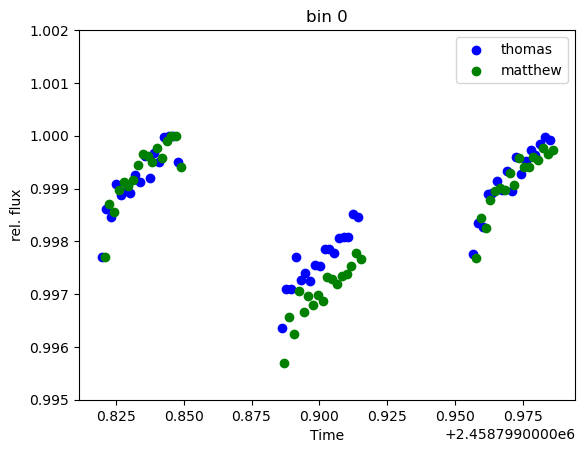

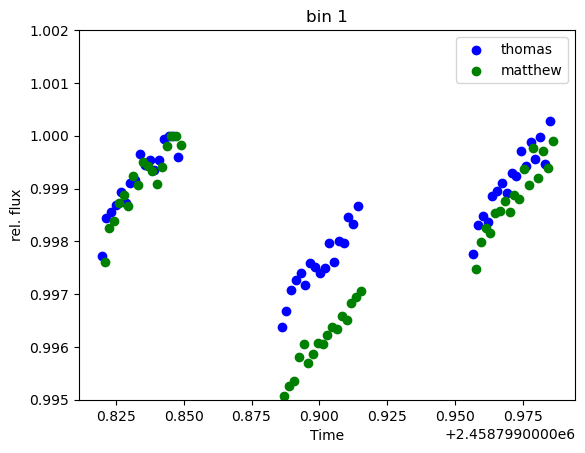

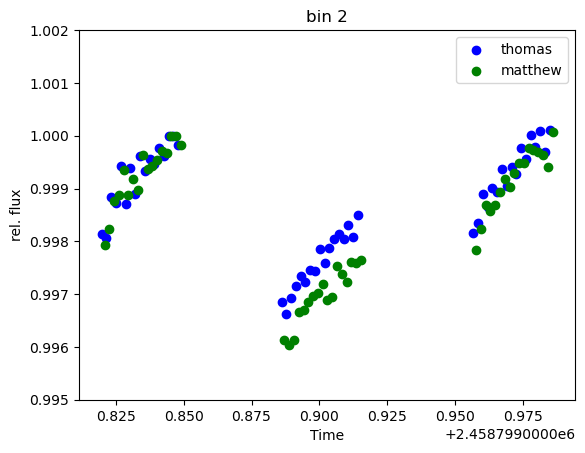

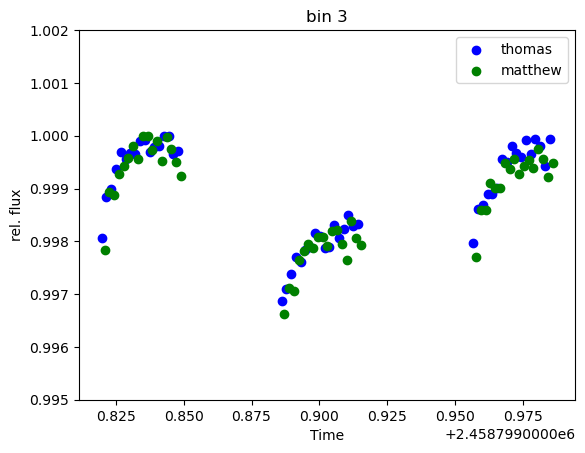

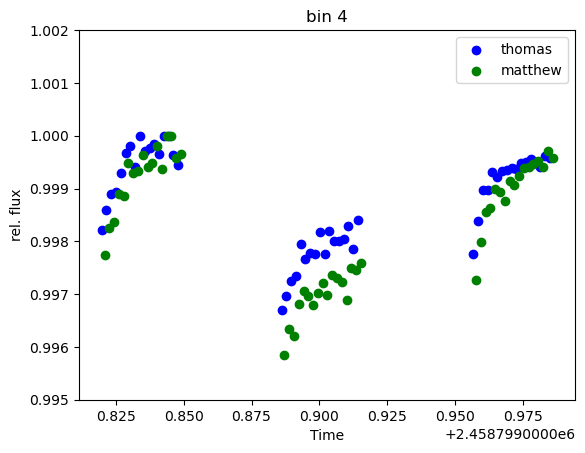

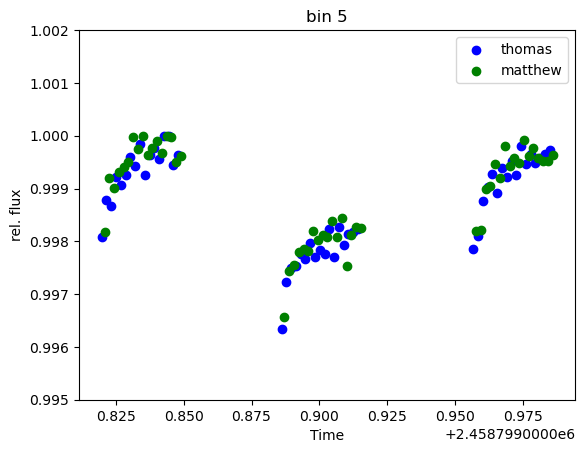

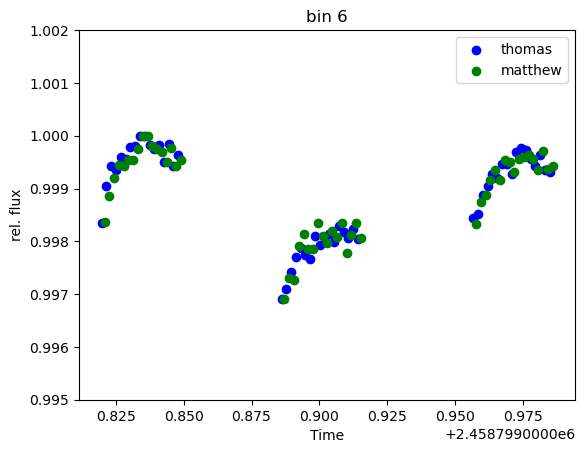

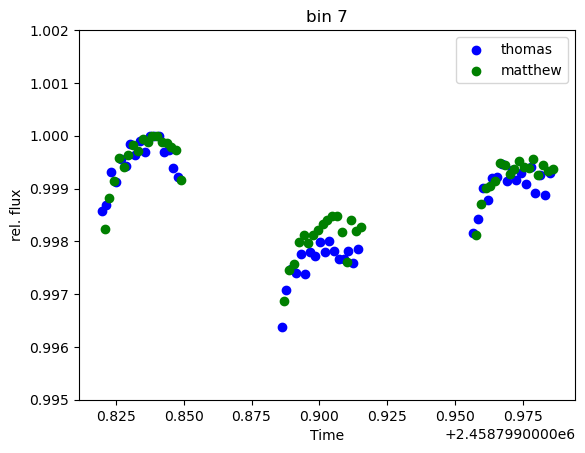

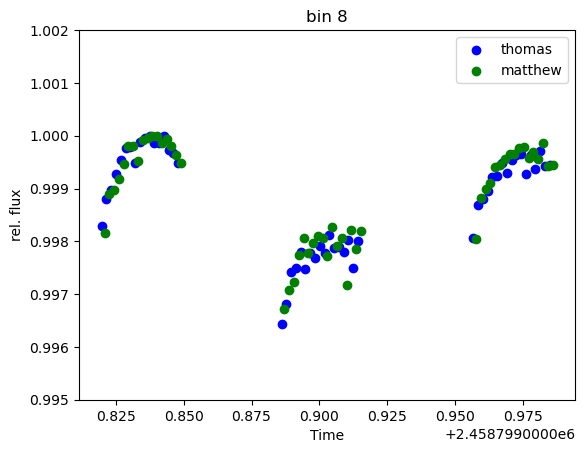

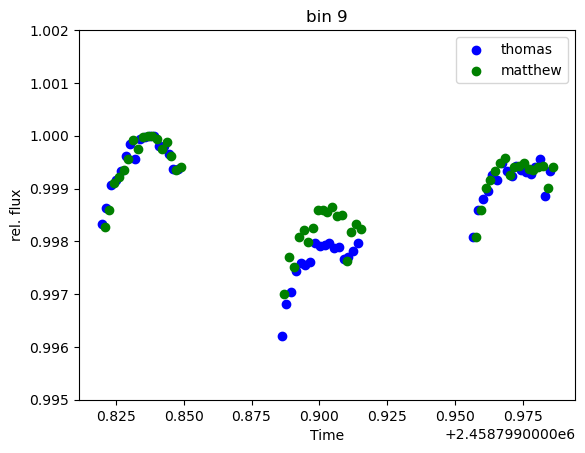

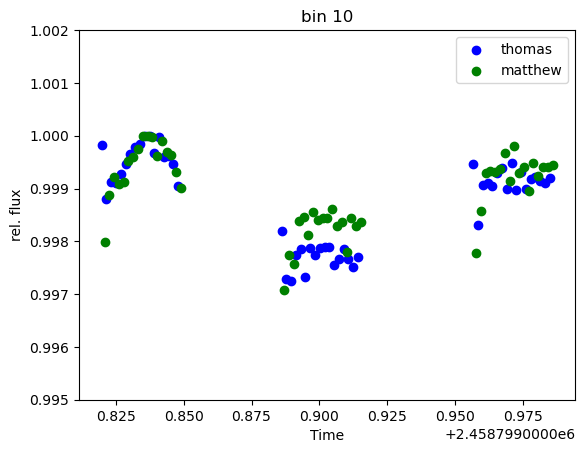

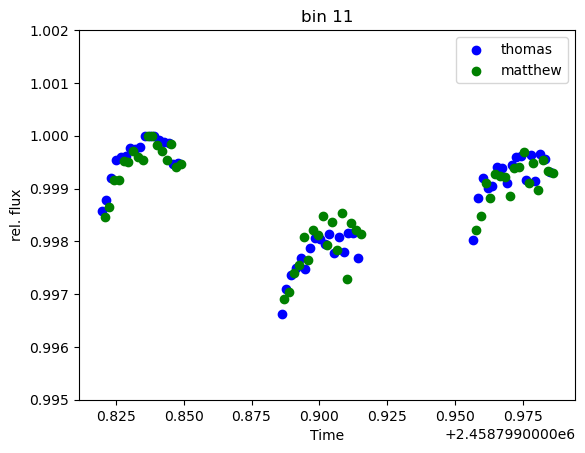

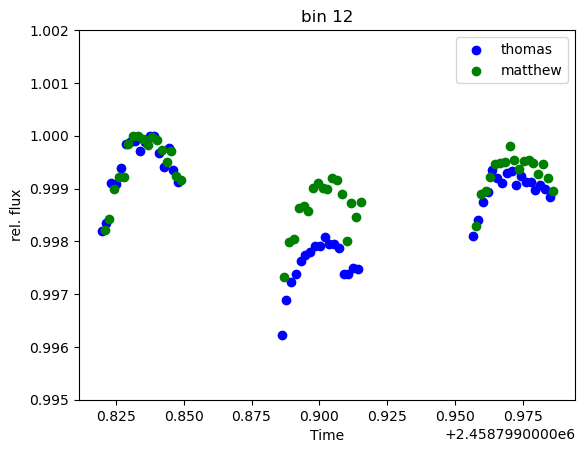

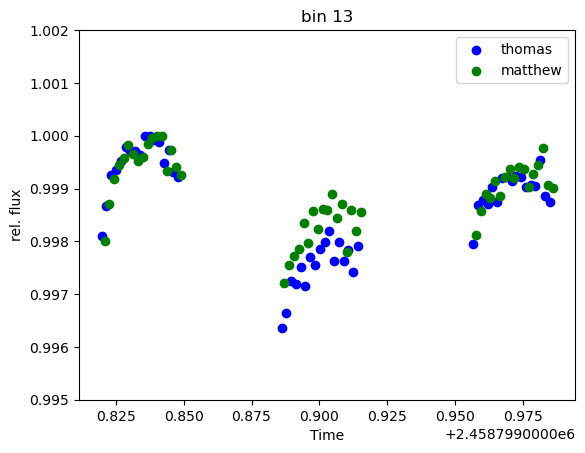

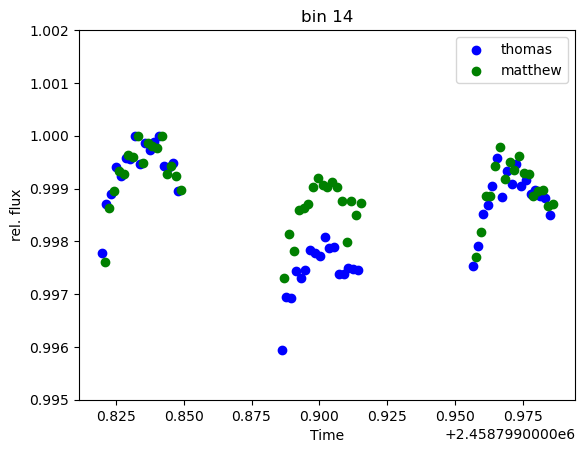

In [6]:
for i in range(oneDspecT.shape[0]):
    plt.scatter(timesT, normspecT[i,:], c='blue', label='thomas')
    plt.scatter(timesM, normspecM[:,i], c='green', label='matthew')
    plt.xlabel('Time')
    plt.ylabel('rel. flux')
    plt.ylim((0.995, 1.002))
    plt.legend(loc='best')
    plt.title('bin %d'%(i))
    plt.show()

In [3]:
# load in my spectral light curves
mydata = np.load('/home/mmmurphy/data/hd219666b/reduced_data/allorbits_rawSpectralLightcurves.npz')
times = np.concatenate((mydata['orbit2_times'], mydata['orbit3_times'], mydata['orbit4_times']))
rawfluxes = np.concatenate((mydata['orbit2_flux'], mydata['orbit3_flux'], mydata['orbit4_flux']))
# the arrays read in as shape (Npoints, Nwaves) but code needs (Nwaves, Npoints), so swap the axes ...
rawfluxes = np.swapaxes(rawfluxes, 0, 1)
rawerrors = np.concatenate((mydata['orbit2_error'], mydata['orbit3_error'], mydata['orbit4_error']))
rawerrors = np.swapaxes(rawerrors, 0, 1)
scandirs = np.concatenate((mydata['orbit2_scandirs'], mydata['orbit3_scandirs'], mydata['orbit4_scandirs']))

fluxesM = np.copy(rawfluxes)
errorsM = np.copy(rawerrors)
Nbins = rawfluxes.shape[0]
for wav in range(Nbins):
    # normalizing thomas'
    sd1_idxs = np.where(scandirs == 1.)[0]
    sd0_idxs = np.where(scandirs == 0.)[0]
    
    # if normalizing by max flux in second orbit:
#     orbit2_sd1 = rawfluxes[wav,:][sd1_idxs][:8]
#     orbit2_sd0 = rawfluxes[wav,:][sd0_idxs][:8]
#     normval1, normval0 = np.max(orbit2_sd1), np.max(orbit2_sd0)
    # if normalizing by median flux of whole visit
    normval1 = np.median(fluxesM[wav, sd1_idxs])
    normval0 = np.median(fluxesM[wav, sd0_idxs])
    
    fluxesM[wav, sd1_idxs] /= normval1
    errorsM[wav, sd1_idxs] /= normval1
    fluxesM[wav, sd0_idxs] /= normval0
    errorsM[wav, sd0_idxs] /= normval0
 
# load in thomas'
tsdata = np.load('./Transit_Spectra_NoFirst_Visit3.npz')
times = tsdata['time']
t_visit = times - times[0]
rawfluxes = tsdata['flux']
rawerrors = tsdata['error']
scandirs = tsdata['scandir']
#waves = tsdata['wavelengths']

fluxesT = np.copy(rawfluxes)
errorsT = np.copy(rawerrors)
Nbins = rawfluxes.shape[0]
for wav in range(Nbins):
    # normalizing thomas'
    sd1_idxs = np.where(scandirs == 1.)[0]
    sd0_idxs = np.where(scandirs == 0.)[0]
    
    # if normalizing by max flux in second orbit:
#     orbit2_sd1 = rawfluxes[wav,:][sd1_idxs][:8]
#     orbit2_sd0 = rawfluxes[wav,:][sd0_idxs][:8]
#     normval1, normval0 = np.max(orbit2_sd1), np.max(orbit2_sd0)
    # if normalizing by median flux of whole visit
    normval1 = np.median(fluxesT[wav, sd1_idxs])
    normval0 = np.median(fluxesT[wav, sd0_idxs])
    
    fluxesT[wav, sd1_idxs] /= normval1
    errorsT[wav, sd1_idxs] /= normval1
    fluxesT[wav, sd0_idxs] /= normval0
    errorsT[wav, sd0_idxs] /= normval0

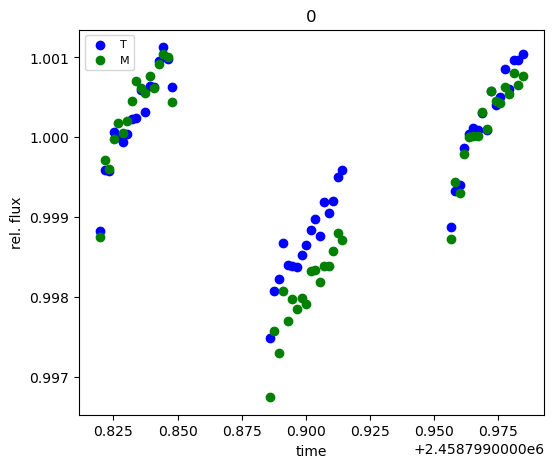

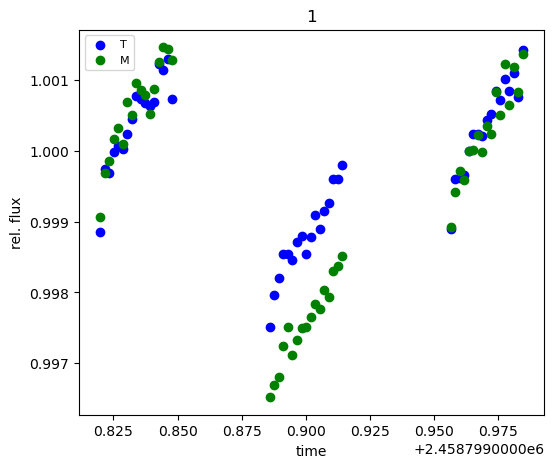

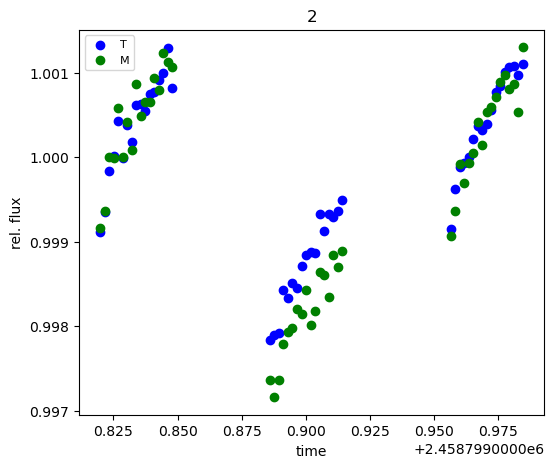

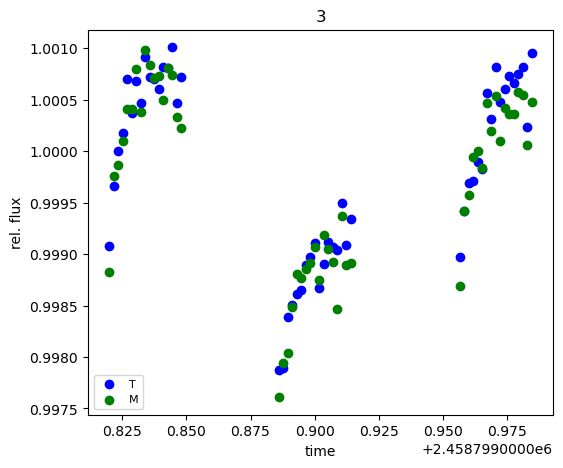

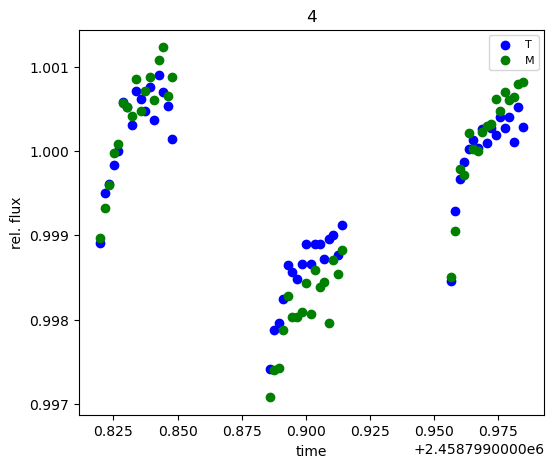

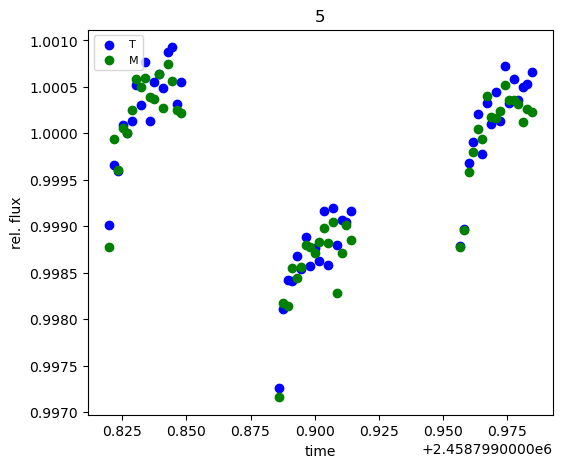

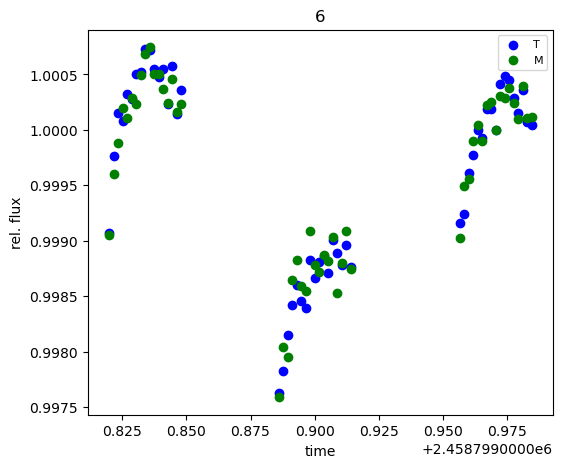

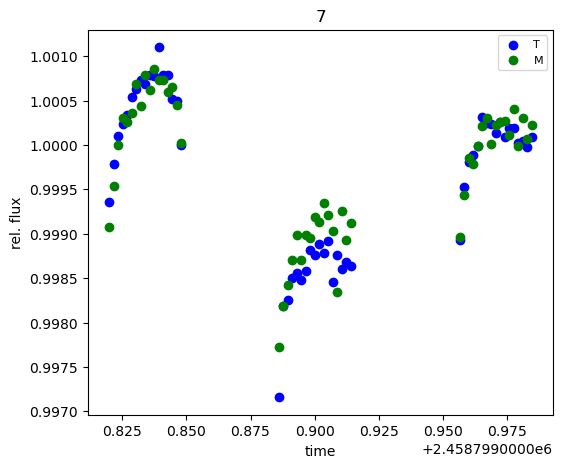

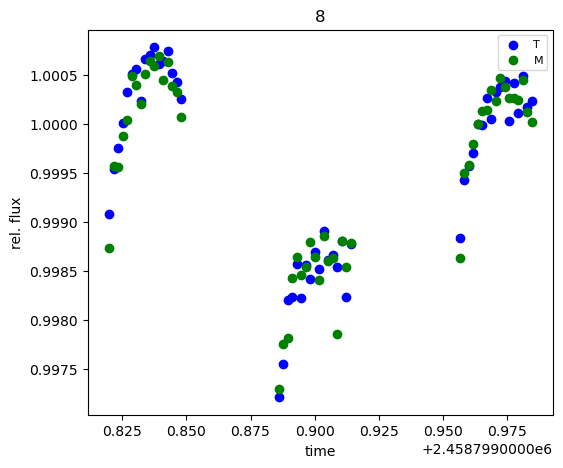

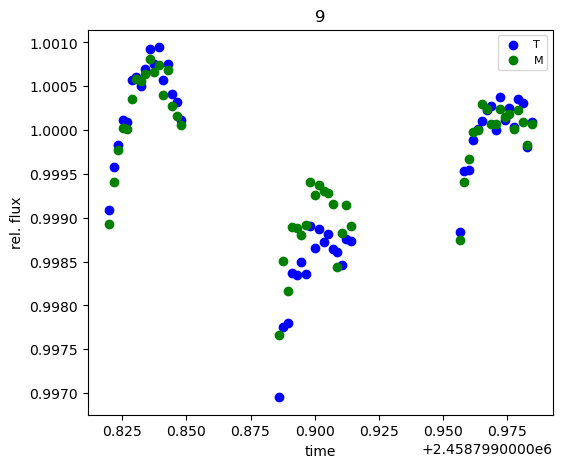

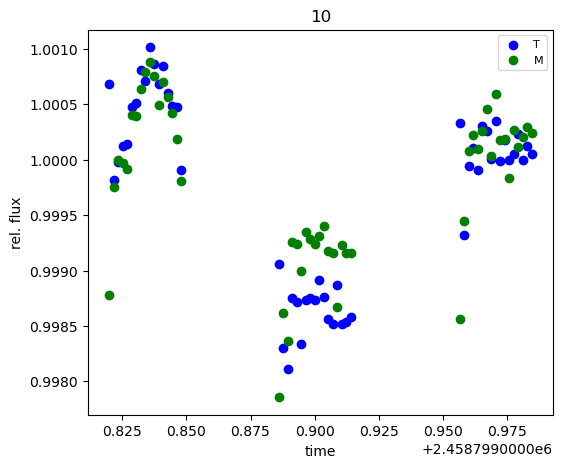

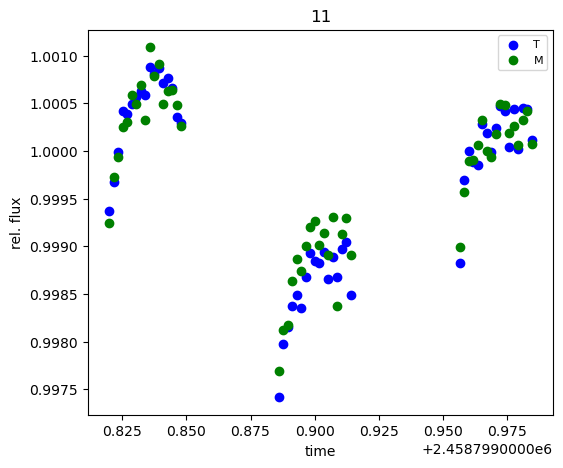

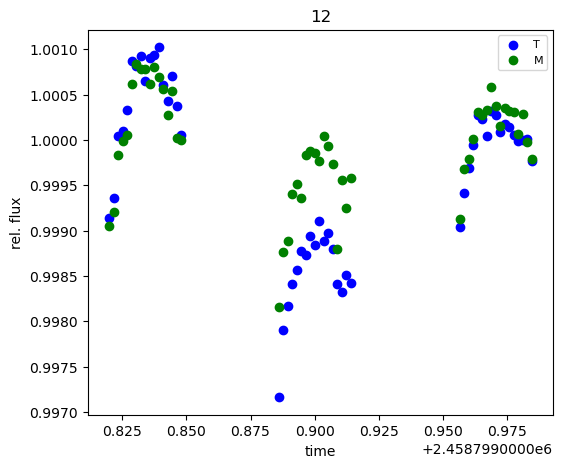

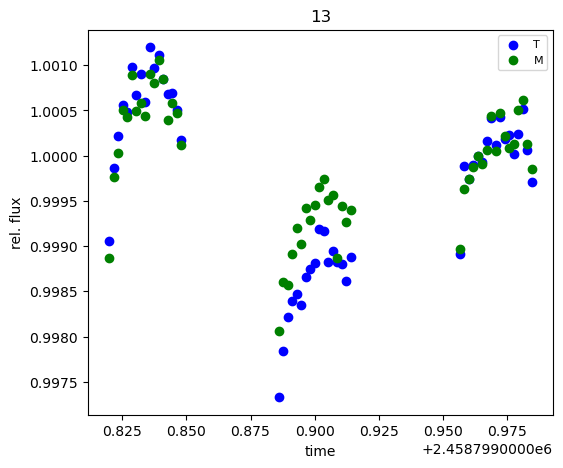

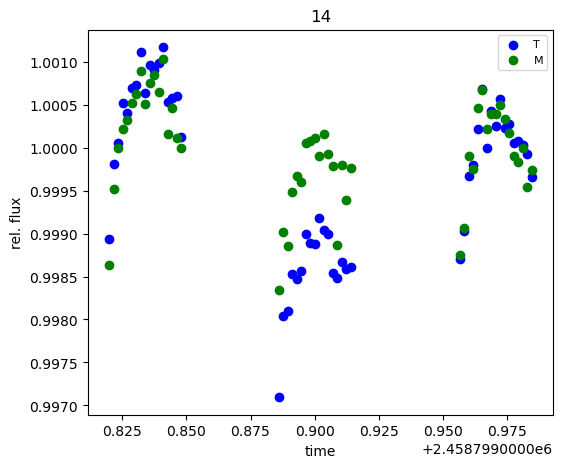

In [4]:
for wav in range(Nbins):
    fig, ax = plt.subplots(figsize=(6,5))
    ax.scatter(times, fluxesT[wav,:], c='blue', label='T')
    ax.scatter(times, fluxesM[wav,:], c='green', label='M')
    ax.set_xlabel('time')
    ax.set_ylabel('rel. flux')
    ax.legend(loc='best', fontsize=8)
    ax.set_title(wav)
    plt.show()